### Thien Win
**Block Renovation - Take Home Assignment <br>
Date: 6/15/2022 <br>
<br>
win.thien@gmail.com <br>
https://www.linkedin.com/in/thien-win-pe/ <br>
https://github.com/win-thien <br>**

In [231]:
#importing libraries and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

From Postgresql, I have exported a filtered csv file to answer the following question:

How much quarterly business has each Source generated for Block? Which sources are performing above or below their historical monthly benchmarks?

- You can define a historical benchmark by whatever method you think fits best - including median, average, or a rolling window of either metric
- Include a visualization of your comparison in your presentation
- What trends or insights do you see here? Does anything surprise you?

In the filtered document, I have removed null values and those that were assigned as "Test" (similar to the definition provided in previous questions of the exercise.

### Data Cleaning

In [232]:
#importing csv file
df = pd.read_csv('block_deal_source.csv')
df

,deal_id,handoff_date,pitched_proposal_date,closed_won_date,deal_value_usd,contact_id,deal_id-2,idx,contact_id-2,user_id,first_name,last_name,property_utm_source,property_hdyh,property_city,property_state,property_serviceable_location,user_id-2,hashed_email
0,380634998,NaN,NaN,2018-11-13 00:00:00,20544.0,773651,380634998,987,773651,1189,Amy,Yu,NaN,met Thinh via CL,Brooklyn,NaN,NaN,1189,32b7e35d46@gmail.com
1,612481221,NaN,NaN,2019-06-21 00:00:00,28776.0,3780601,612481221,4706,3780601,1225,Di,Wu,NaN,facebook,NaN,NaN,NaN,1225,c6e4950401@gmail.com
2,697516743,NaN,NaN,2020-01-16 00:00:00,17324.0,4781151,697516743,6040,4781151,1295,Louis,Konig,NaN,facebook,NaN,NaN,NaN,1295,eecde3fb1b@gmail.com
3,709621906,NaN,NaN,2020-08-20 00:00:00,26425.0,4801651,709621906,6073,4801651,1322,Brian,Gwiazdowski,NaN,instagram,NaN,NaN,NaN,1322,ab55753ab2@gmail.com
4,520451615,NaN,NaN,2019-04-09 00:00:00,27931.0,3085051,520451615,3861,3085051,1336,Suzanne,Tomatore,adwords,Friend,BROOKLYN,NY,SERVICEABLE,1336,ea53438812@yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,5650019489,2021-07-06 00:00:00,2021-07-09 00:00:00,2021-07-10 00:00:00,21372.0,41681051,5650019489,72617,41681051,34879,Frantz,Masse,GeistM,Facebook,WEST ORANGE,NJ,SERVICEABLE,34879,b82a331554@gmail.com
612,5607411834,2021-07-06 00:00:00,2021-07-10 00:00:00,2021-07-12 00:00:00,40007.0,41815201,5607411834,72776,41815201,34923,James,Thompson,NaN,Youtube,HOBOKEN,NJ,SERVICEABLE,34923,3ef5a2a153@gmail.com
613,5659779463,2021-07-11 00:00:00,2021-07-13 00:00:00,2021-07-13 00:00:00,17284.0,42087851,5659779463,73198,42087851,35262,aaron,hulsizer,adwords,Google,BROOKLYN,NY,SERVICEABLE,35262,2e1cb14fa9@me.com
614,5677967942,NaN,2021-07-12 00:00:00,2021-07-13 00:00:00,20113.0,41882051,5677967942,72925,41882051,35301,Steven,Butler,NaN,Friend,NEW YORK,NY,SERVICEABLE,35301,b36044b933@gmail.com


Our primary focus is on the deal amount and the Source of the referrer. We can drop all other columns that are not of interest to us.

In [233]:
#define columns of interest
interest = ['property_utm_source', 'closed_won_date', 'deal_value_usd']

#assign columns to a new dataframe
df2 = df[interest]

#sanity check
df2

,property_utm_source,closed_won_date,deal_value_usd
0,NaN,2018-11-13 00:00:00,20544.0
1,NaN,2019-06-21 00:00:00,28776.0
2,NaN,2020-01-16 00:00:00,17324.0
3,NaN,2020-08-20 00:00:00,26425.0
4,adwords,2019-04-09 00:00:00,27931.0
...,...,...,...
611,GeistM,2021-07-10 00:00:00,21372.0
612,NaN,2021-07-12 00:00:00,40007.0
613,adwords,2021-07-13 00:00:00,17284.0
614,NaN,2021-07-13 00:00:00,20113.0


I will further format the data to be all lowercase to make sure that things like 'Facebook' and 'facebook' are accounted for as the same platform.

In [234]:
df2['property_utm_source'] = df2['property_utm_source'].str.lower()
df2

,property_utm_source,closed_won_date,deal_value_usd
0,NaN,2018-11-13 00:00:00,20544.0
1,NaN,2019-06-21 00:00:00,28776.0
2,NaN,2020-01-16 00:00:00,17324.0
3,NaN,2020-08-20 00:00:00,26425.0
4,adwords,2019-04-09 00:00:00,27931.0
...,...,...,...
611,geistm,2021-07-10 00:00:00,21372.0
612,NaN,2021-07-12 00:00:00,40007.0
613,adwords,2021-07-13 00:00:00,17284.0
614,NaN,2021-07-13 00:00:00,20113.0


We will now check out the datatypes to make sure they are aligned with what is to be expected.

In [235]:
df2.dtypes

property_utm_source     object
closed_won_date         object
deal_value_usd         float64
dtype: object

We need to convert the closed_won_date to a datetime type.

In [236]:
df2['closed_won_date'] = pd.to_datetime(df2['closed_won_date'])
df2.dtypes

property_utm_source            object
closed_won_date        datetime64[ns]
deal_value_usd                float64
dtype: object

We will create a separate column that extracts the quarter from this converted datetime column so that information can be assessed on a quarterly basis.

In [237]:
df2['quarter'] = df2['closed_won_date'].dt.to_period('Q')
df2

,property_utm_source,closed_won_date,deal_value_usd,quarter
0,NaN,2018-11-13,20544.0,2018Q4
1,NaN,2019-06-21,28776.0,2019Q2
2,NaN,2020-01-16,17324.0,2020Q1
3,NaN,2020-08-20,26425.0,2020Q3
4,adwords,2019-04-09,27931.0,2019Q2
...,...,...,...,...
611,geistm,2021-07-10,21372.0,2021Q3
612,NaN,2021-07-12,40007.0,2021Q3
613,adwords,2021-07-13,17284.0,2021Q3
614,NaN,2021-07-13,20113.0,2021Q3


In [238]:
df2.dtypes

property_utm_source            object
closed_won_date        datetime64[ns]
deal_value_usd                float64
quarter                 period[Q-DEC]
dtype: object

In addition, there are some incomplete information regarding the marketing Source. 

In [239]:
#counting null values in property_utm_source
df2['property_utm_source'].isna().sum()

343

We are missing 343 entries for the marketing Source data. For the sake of this analysis, we will remove these observations and assign to a separate dataframe should we want to revert back. 

In [279]:
df3 = df2.dropna(axis=0, subset=['property_utm_source'])
df3

,property_utm_source,closed_won_date,deal_value_usd,quarter
4,adwords,2019-04-09,27931.0,2019Q2
54,hs_automation,2020-06-09,21069.0,2020Q2
58,hs_email,2021-05-13,31241.0,2021Q2
68,adwords,2021-02-23,47196.0,2021Q1
70,adwords,2020-04-30,44253.0,2020Q2
...,...,...,...,...
606,facebook,2021-07-07,32463.0,2021Q3
607,hs_automation,2021-07-09,49555.0,2021Q3
608,adwords,2021-07-07,26472.0,2021Q3
611,geistm,2021-07-10,21372.0,2021Q3


In [280]:
#query how many unique marketing sources are present
df3['property_utm_source'].unique()

array(['adwords', 'hs_automation', 'hs_email', 'facebook', 'brownstoner',
       'brickunderground', 'youtube,adwords', 'test_source', 'geistm',
       'referral', 'houzz', 'okl', 'my_plan', 'attentive'], dtype=object)

The 'youtube,adwords' source will be changed to 'youtube' as to not present any problems down the line as follows:

In [281]:
df3['property_utm_source'] = np.where(df3['property_utm_source']=='youtube,adwords', 'youtube', df3['property_utm_source'])

In [283]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 4 to 613
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_utm_source  273 non-null    object        
 1   closed_won_date      273 non-null    datetime64[ns]
 2   deal_value_usd       273 non-null    float64       
 3   quarter              273 non-null    period[Q-DEC] 
dtypes: datetime64[ns](1), float64(1), object(1), period[Q-DEC](1)
memory usage: 10.7+ KB


We have cleaned the data enough to start performing some analysis on the impact of the different marketing sources.

### Data Analysis 

In first trying to understand how the marketing Sources have contributed to quarterly growth, we first seek to see date interval at which we have complete data for and the total of deals closed in that quarter. 

In [284]:
df3.groupby('quarter').sum()

,deal_value_usd
quarter,
2019Q2,27931.0
2019Q3,264161.0
2019Q4,1106767.0
2020Q1,435910.0
2020Q2,212276.0
2020Q3,240243.0
2020Q4,1265921.0
2021Q1,1600676.0
2021Q2,4044951.0


From the above, we have information from Q2 of 2019 through Q3 of 2021. We can see how the deal_value in each quarter which is summarized in the following plot.

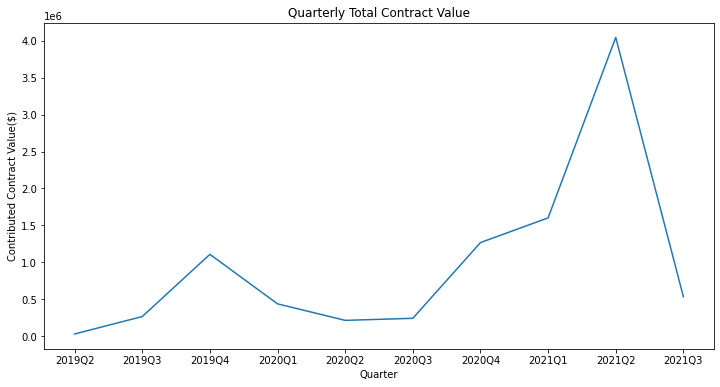

In [285]:
x = np.arange(0,10,1)

plt.figure(figsize=(12,6))
plt.plot(x,df3.groupby('quarter').sum().values)
plt.xticks(x, labels=df3.groupby('quarter').sum().index)
plt.title('Quarterly Total Contract Value')
plt.ylabel('Contributed Contract Value($)')
plt.xlabel('Quarter')
plt.show()

Surprisingly so, large growth was seen from 2020Q3 into 2021Q2 given the nature of the global pandemic during this time period.

Approaching the question at hand, I want to determine the dollar contribution of the different sources for each quarter to see if additional trends or insights can be established. We can see from the plot below how each marketing source has contributed to the total contract value of completed data. 

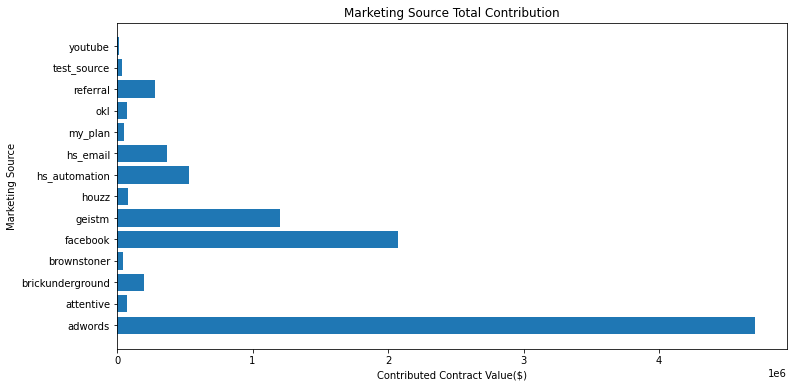

In [286]:
source_cont = df3.groupby('property_utm_source')['deal_value_usd'].sum()

plt.figure(figsize=(12,6))
plt.barh(source_cont.index, source_cont.values)
plt.title('Marketing Source Total Contribution')
plt.ylabel('Marketing Source')
plt.xlabel('Contributed Contract Value($)')
plt.show()

We can see from the above that 'adwords' contributed to the majority of marketing source efforts and 'youtube' has contributed the least. In taking this further, we will now separate the market source per quarter which is summarized below.

In [320]:
#group each quarter and contributing source
quarter_source = df3.groupby(['quarter','property_utm_source']).sum()
quarter_source 

deal_value_usd
quarter property_utm_source                
2019Q2  adwords                     27931.0
2019Q3  adwords                    144256.0
        brickunderground            32210.0
        facebook                    87695.0
2019Q4  adwords                    659007.0
        brickunderground            46701.0
        facebook                   270981.0
        hs_automation               53283.0
        hs_email                    60168.0
        youtube                     16627.0
2020Q1  adwords                    111246.0
        facebook                    96032.0
        geistm                     174303.0
        hs_email                    19560.0
        test_source                 34769.0
2020Q2  adwords                    114349.0
        facebook                    31139.0
        hs_automation               66788.0
2020Q3  adwords                    114765.0
        brownstoner                 18385.0
        facebook                    75894.0
        okl                         31199.0
2020Q4  adwords                    680667.0
        brickunderground            48280.0
        brownstoner                 25931.0
        facebook                   176039.0
        geistm                     118380.0
        hs_automation               67849.0
        hs_email                    56060.0
        my_plan                     47750.0
        okl                         44965.0
2021Q1  adwords                    765925.0
        brickunderground            47065.0
        facebook                    87295.0
        geistm                     352428.0
        hs_automation              155650.0
        hs_email                   151578.0
        referral                    40735.0
2021Q2  adwords                   1929258.0
        attentive                   76879.0
        brickunderground            24675.0
        facebook                  1093855.0
        geistm                     432160.0
        houzz                       76962.0
        hs_automation               89296.0
        hs_email                    81716.0
        referral                   240150.0
2021Q3  adwords                    159468.0
        facebook                   153304.0
        geistm                     122014.0
        hs_automation               99110.0

The above multi-level dataframe summarizes the impact of each present marketing source per quarter. In order to understand the performance of each source, a baseline metric needs to be decided on. For this exercise, it was decided to use a quarterly mean of the deal value present source. 

In [439]:
#establish mean for each quarter as evaluating metric
mean_deal = reset_source.groupby('quarter').mean()
mean_deal = mean_deal.reset_index()
mean_deal

,quarter,deal_value_usd
0,2019Q2,27931.000000
1,2019Q3,88053.666667
2,2019Q4,184461.166667
3,2020Q1,87182.000000
4,2020Q2,70758.666667
5,2020Q3,60060.750000
6,2020Q4,140657.888889
7,2021Q1,228668.000000
8,2021Q2,449439.000000
9,2021Q3,133474.000000


With a performance metric determined, I will now combine this metric and plot it against the different sources per quarter.

In [440]:
#resetting index for ease of plotting
reset_source = quarter_source.reset_index()

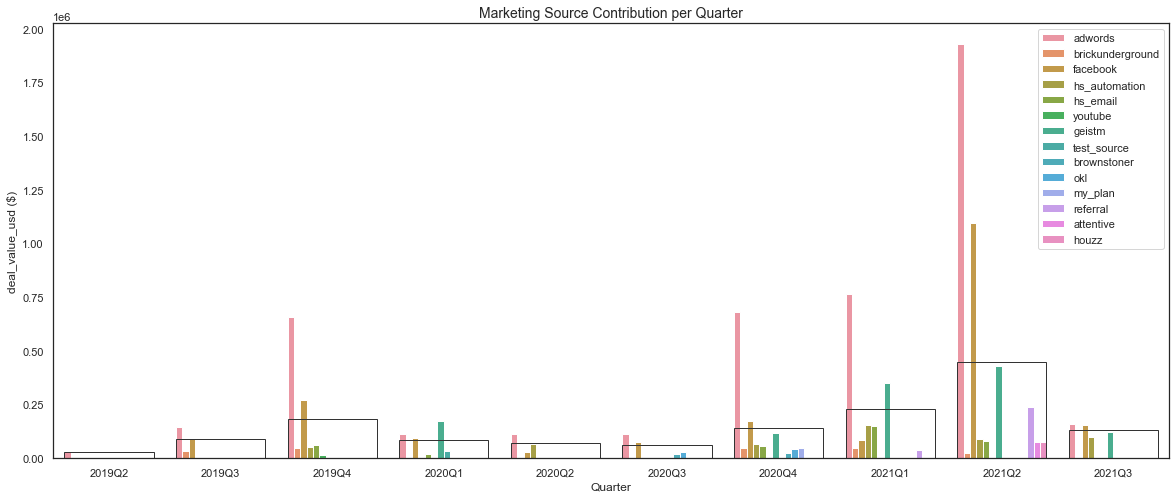

In [386]:
plt.figure(figsize=(20,8))
sns.barplot(data = reset_source, x = 'quarter', y ='deal_value_usd', hue = 'property_utm_source')
sns.barplot(data = mean_deal, x = 'quarter', y ='deal_value_usd', linewidth=1, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")
plt.title('Marketing Source Contribution per Quarter', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('deal_value_usd ($)')
plt.legend()
plt.show()

In the above plot, the encompassing clear bar for each quarter is the average dollar amount of deals given the number of sources for the same quarter. We can see how the marketing efforts have contributed to the overall closed deals through time as shown and the performance of each source as compared to the average. From a cursory glance, I make the following observations:
- 'adwords' has shown significant benefit from 2020Q1 through 2021Q2
- 'adwords' has outperformed the average for every quarter
- 'geistm' has shown increased benefit from 2020Q2 through 2021Q2
- Large growth in 'facebook' benefit in 2021Q2
- Several quarters has shown 'facebook' and 'geistm' nearly outperforming or outperforming the average

We can further distill the above plot to look at each marketing avenue pursued in the given timeframe.

In [442]:
#create function for easy plotting of each source
def plot_quarter_source(source):
    plot_df = reset_source[reset_source['property_utm_source']==source]
    plt.figure(figsize=(20,8))
    sns.barplot(data = plot_df, x = 'quarter', y ='deal_value_usd', color='steelblue', alpha=0.7)
    plt.title(f'{source} Contribution per Quarter', fontsize=16)
    plt.xlabel('Quarter')
    plt.ylabel('deal_value_usd ($)')
    plt.show()

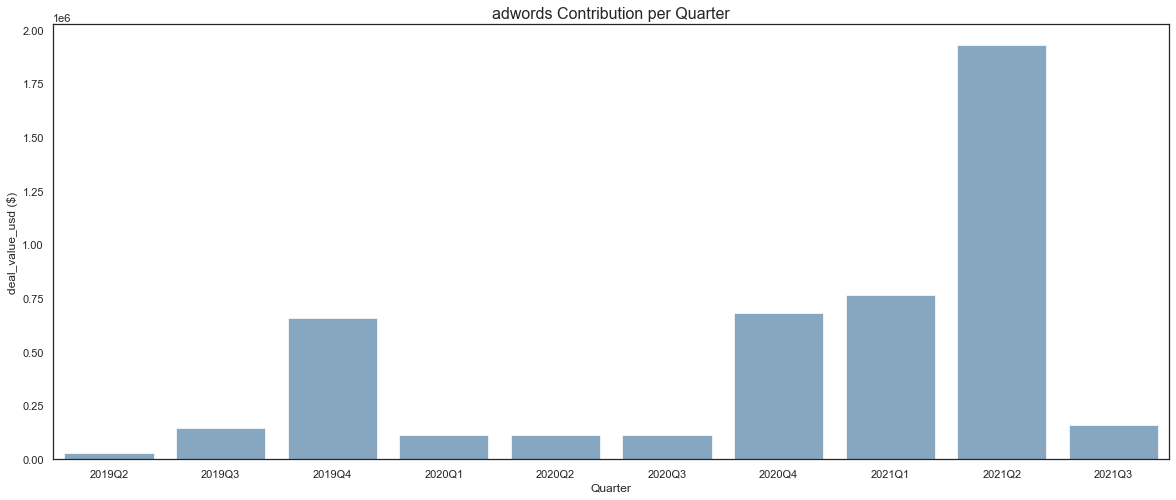

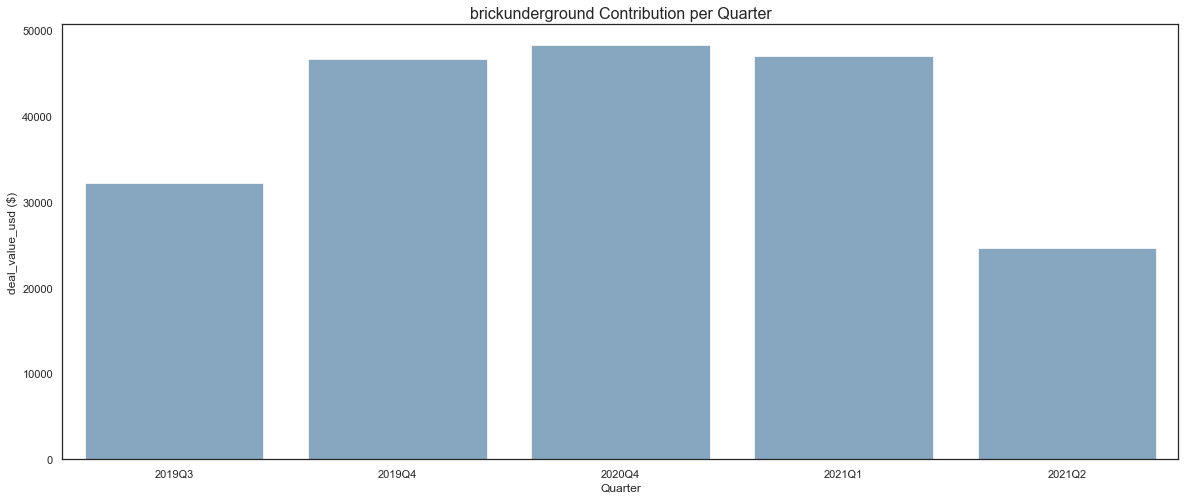

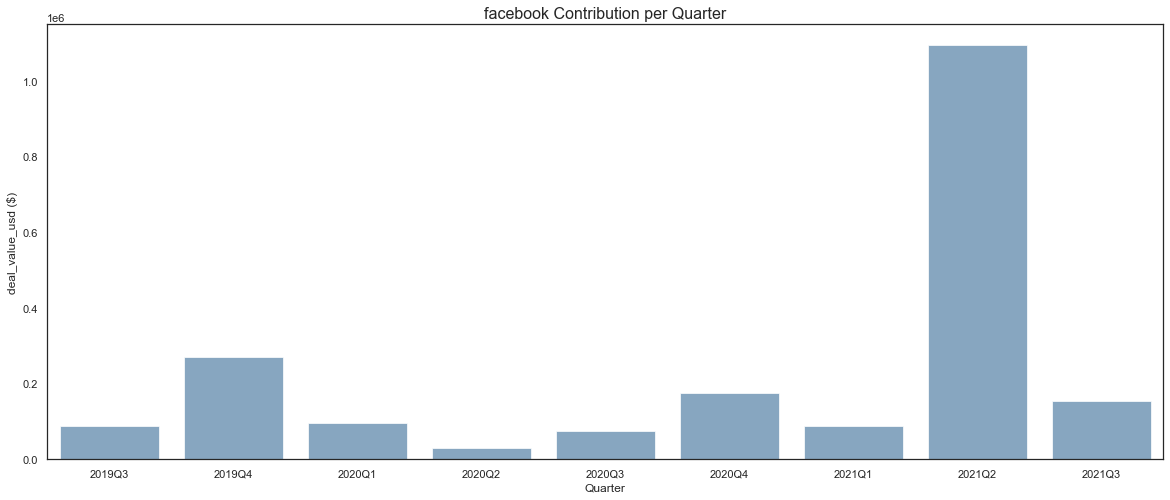

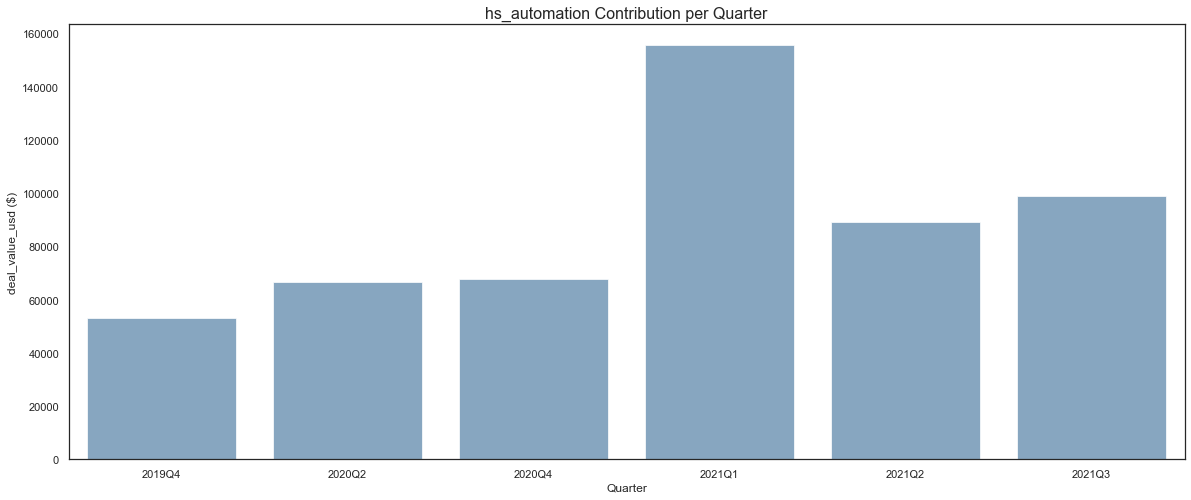

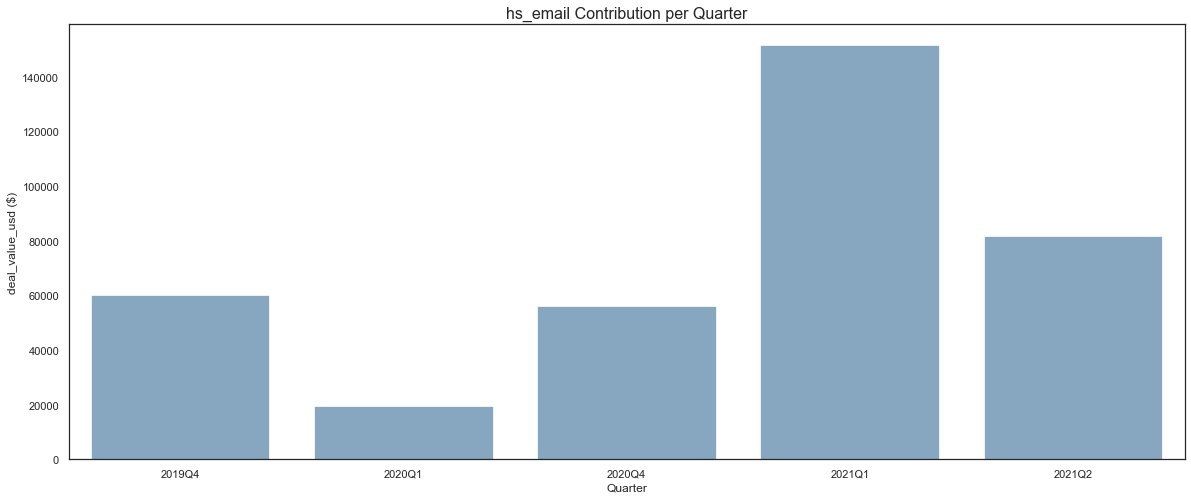

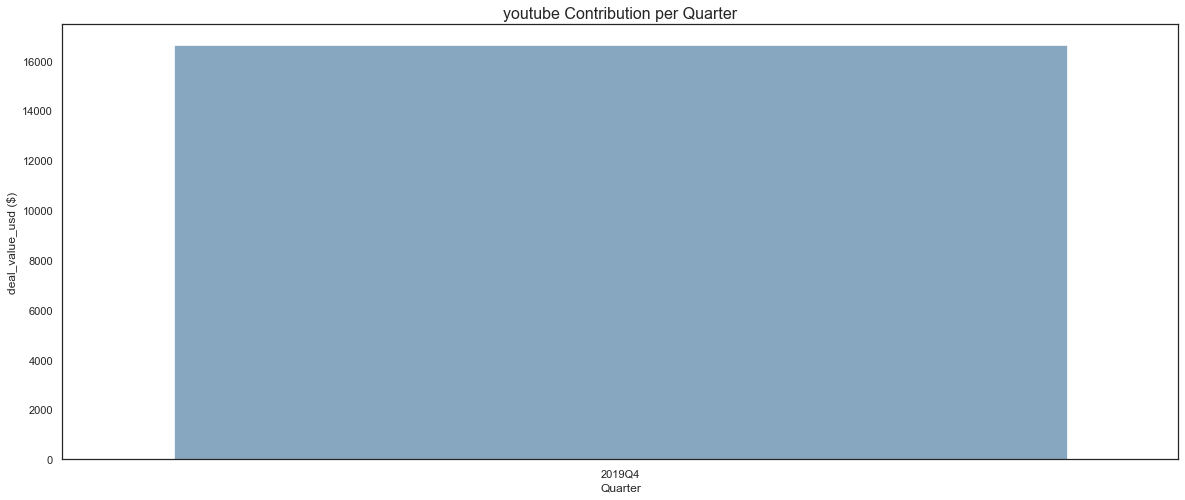

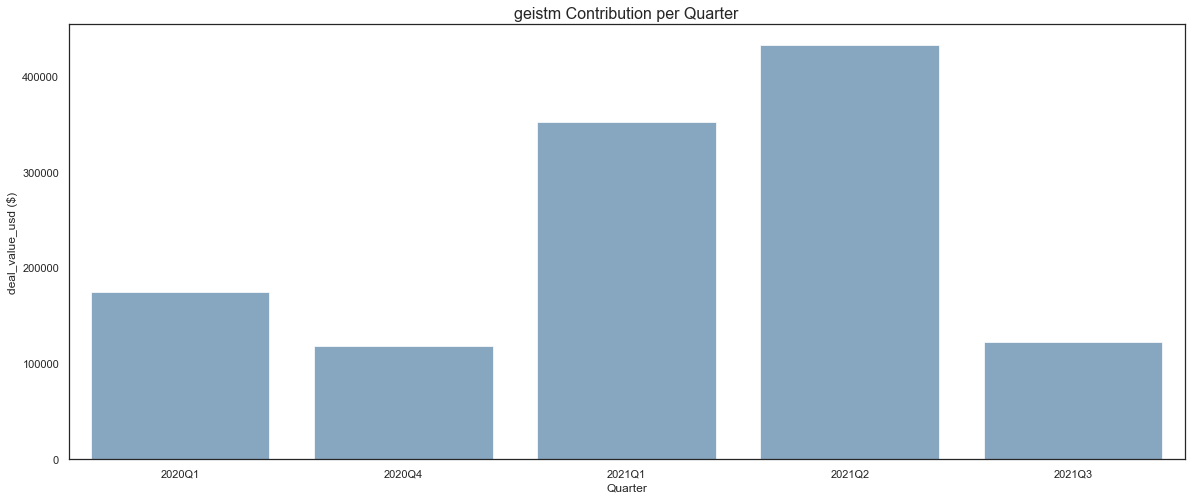

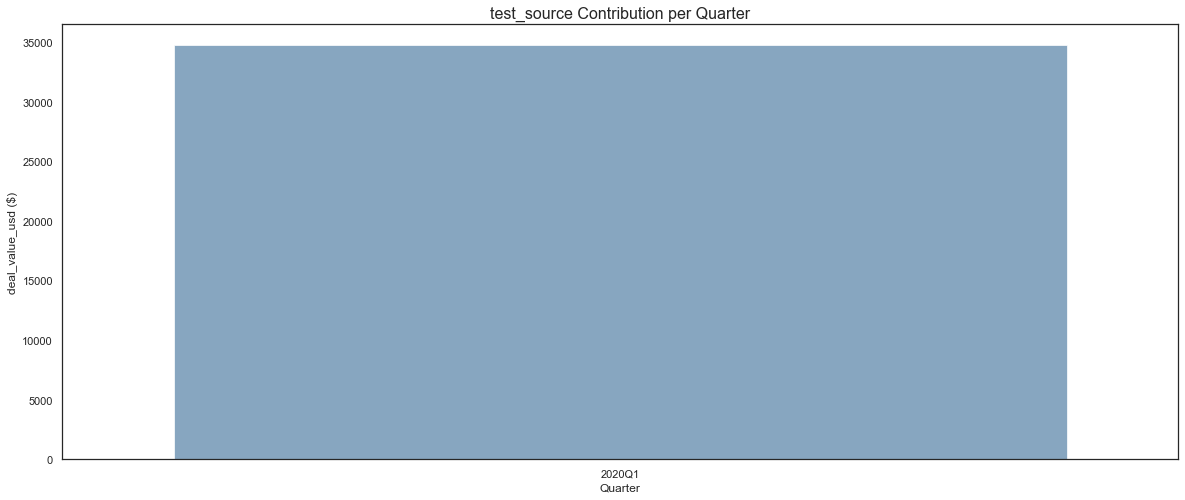

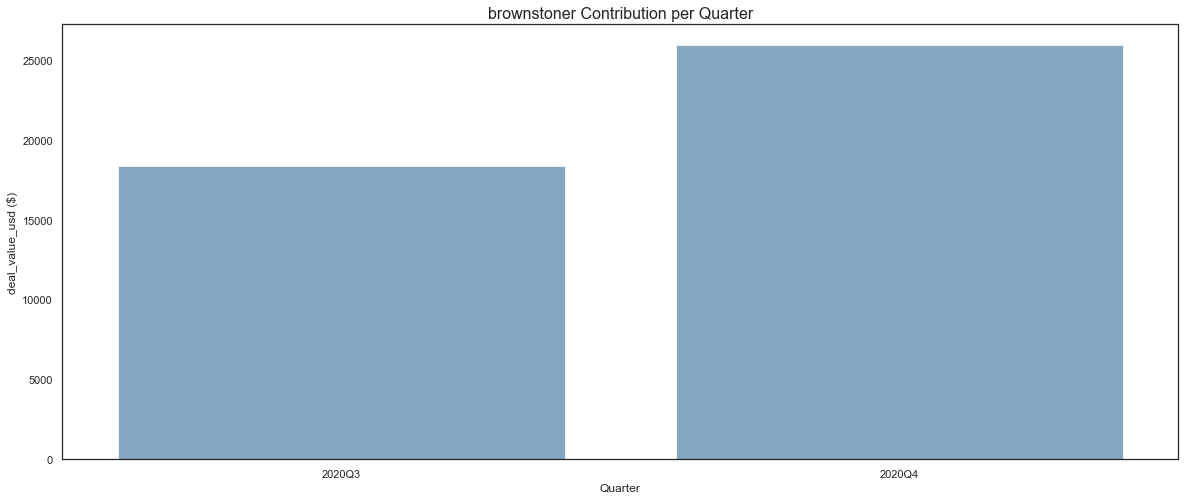

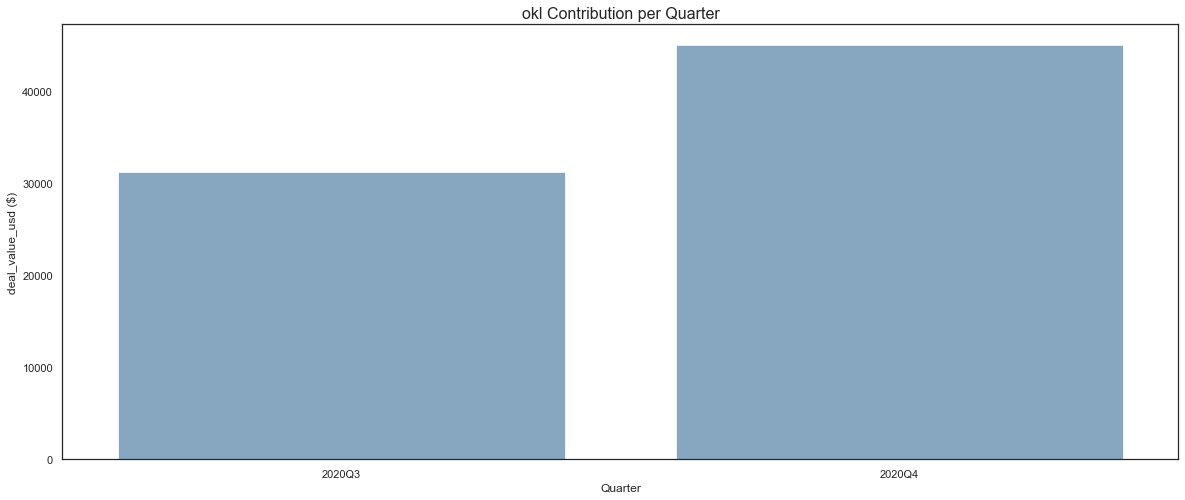

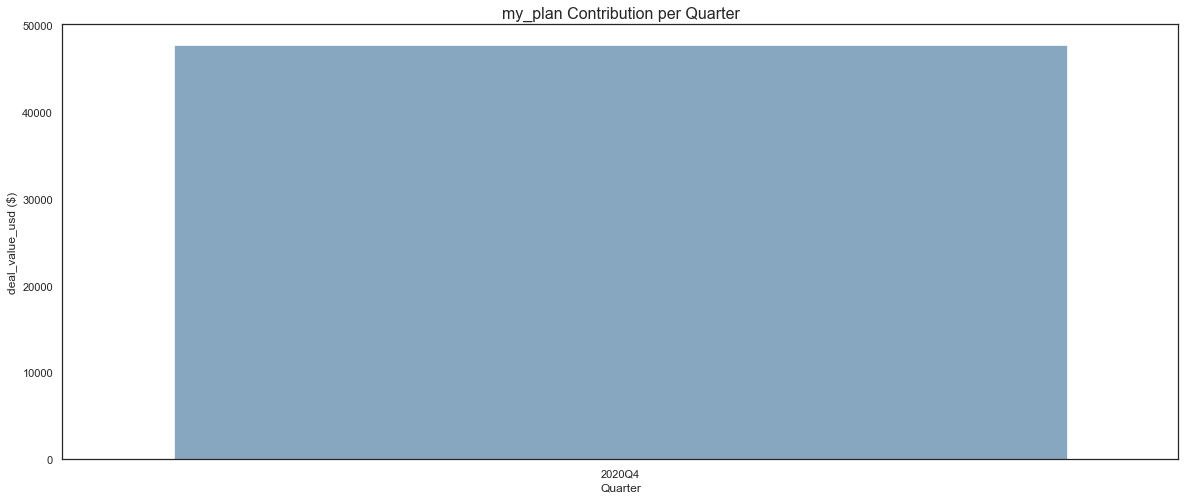

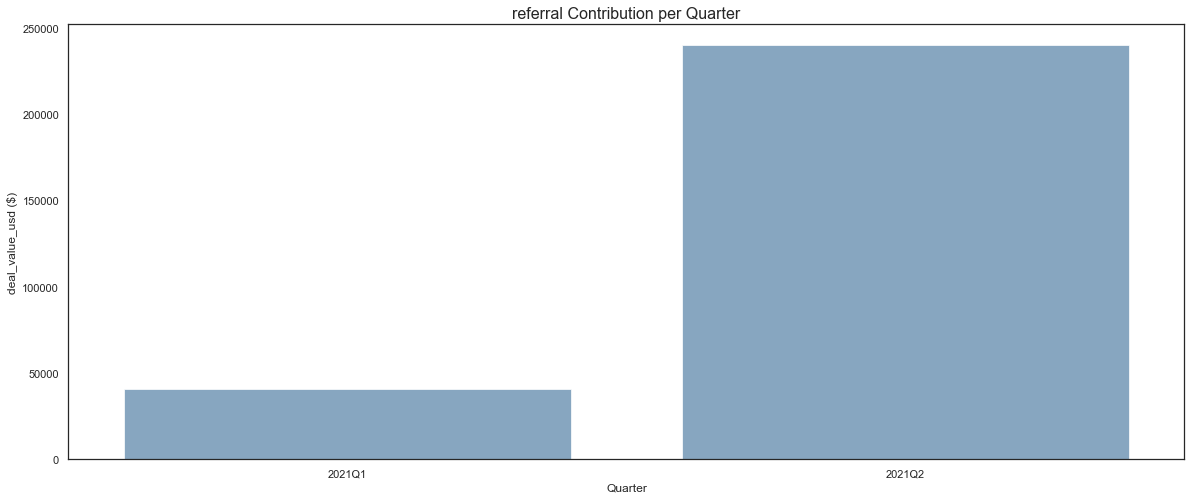

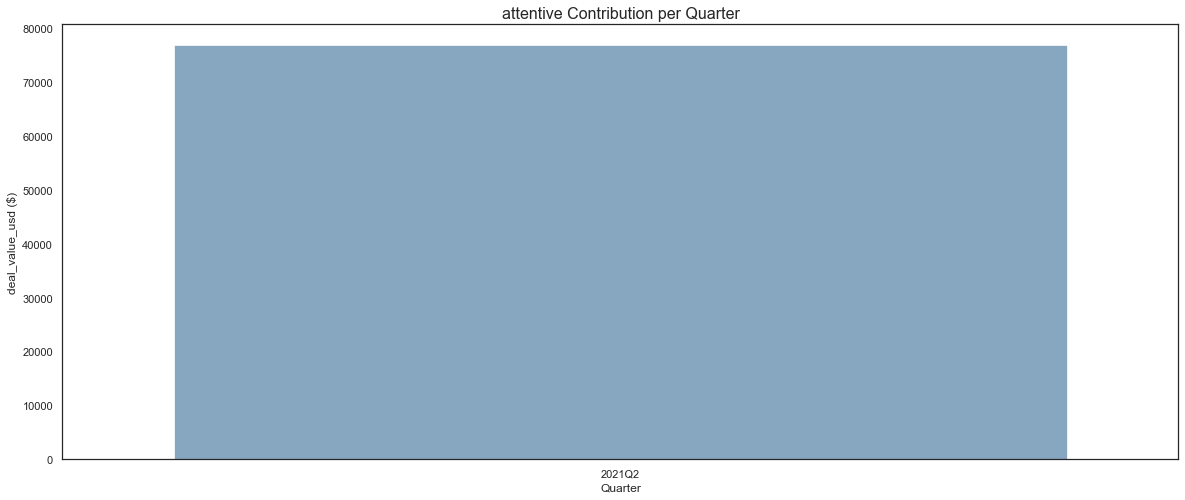

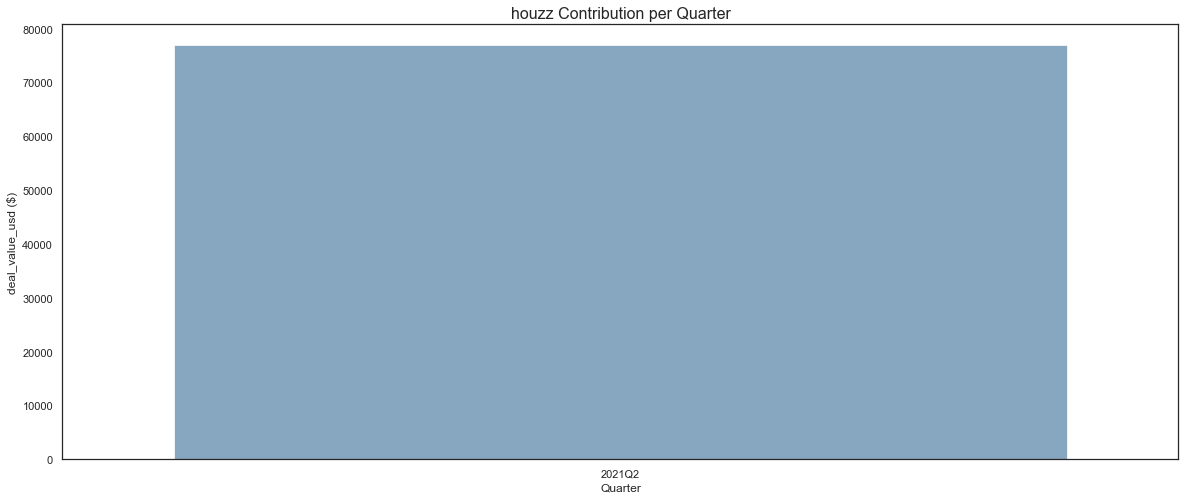

In [443]:
#iterate through each source
for i in reset_source['property_utm_source'].unique():
    plot_quarter_source(i)

With each source plotted against the mean for the given quarter, the following observations are made:
- Surprising to see how little Youtube contributes to quarterly deals
- Inconsistent sources from quarter to quarter. This may be due to lapsed marketing contracts/efforts or an indication of adoption/termination of marketing source
- Expected Facebook to contribute more 

### Limitations and Recommendations 

Understanding that this exercise does not include the entire picture of marketing efforts, some additional limitations exist that may skew the effectiveness of these efforts:
- Much, if not all of the data has occurred in a pandemic environment which may have limited the potential effectiveness of these marketing efforts
- Additional context for these efforts such as cost, campaign duration etc. could elevate this analysis further
- Limited/incomplete data

Given these limitations, I have formulated some potential action items towards maximizing the benefit of marketing efforts:
1. Request that each employee post about Block Renovation on their professional/personal social media page, offering an incentive for referral.
2. Generate more video content for Facebook and Youtube to increase visibility and educate people on the process and benefits. Casestudies and testimonials could be great here.    
3. Maintain efforts on Adwords source as that has been proven to contribute the most to quarterly success.
4. Further analysis of unsigned/rejected proposals, ROI on marketing efforts, and average deal amount per source.
5. Increase visibility on Geist M as that has shown potential of exceeding the quarterly average.

### Conlusion 

This concludes the analysis on the marketing source and its contribution to quarterly success. Should you have any questions or comments, please feel free to contact me with the information found at the beginnign of this document. 